In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Inbound Tourists

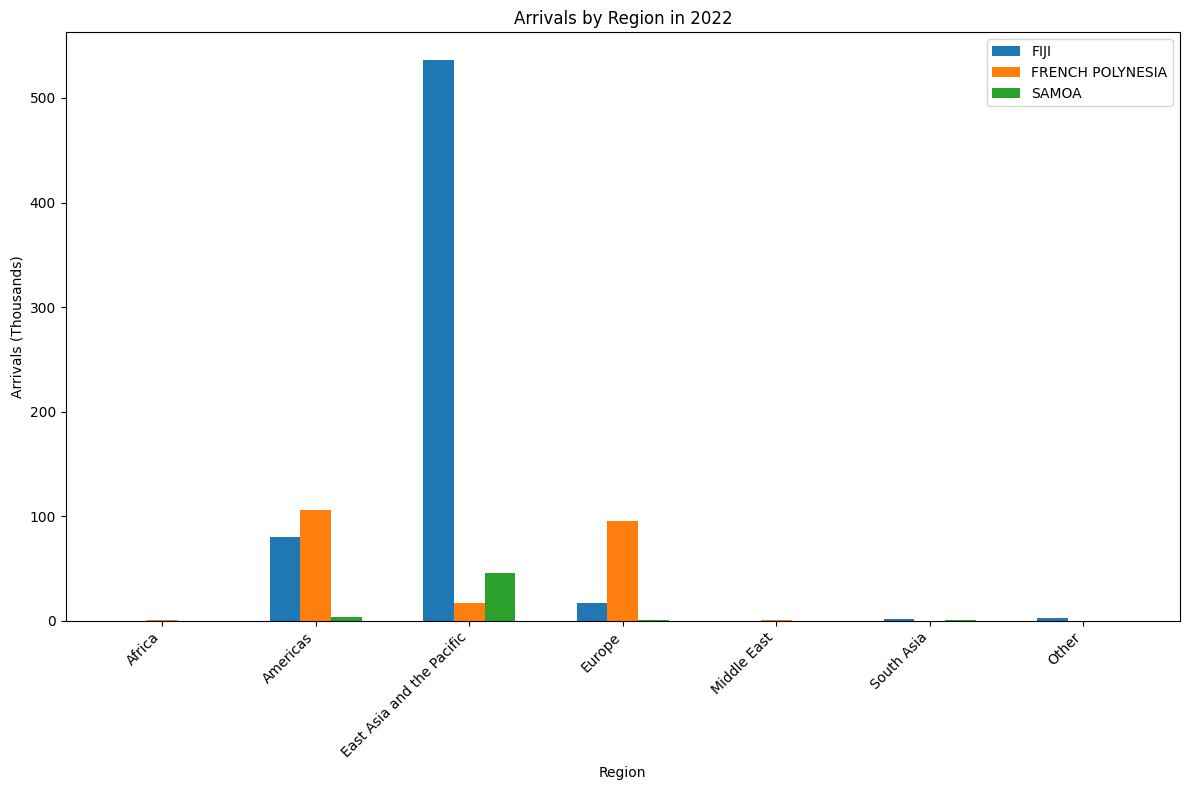

In [4]:
# Load the provided Excel file
file_path = 'arrive by region.xlsx'
arrivals = pd.read_excel(file_path)

# Convert column names to strings
arrivals.columns = arrivals.columns.astype(str)

# Filter data for each country and region
countries = arrivals['Country'].unique()
regions = arrivals['Arrivals from regions'].unique()

# Create a dataframe to hold the sums for each country and region
region_data = pd.pivot_table(arrivals, values=['2022'], index=['Country', 'Arrivals from regions'], aggfunc='sum')

# Prepare data for the bar chart
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.2
x = np.arange(len(regions))

# Plot bars for each country
for i, country in enumerate(countries):
    region_sums = region_data.loc[country].sum(axis=1).values
    ax.bar(x + i * bar_width, region_sums, bar_width, label=country)

# Add labels, title, and legend
ax.set_xlabel('Region')
ax.set_ylabel('Arrivals (Thousands)')
ax.set_title('Arrivals by Region in 2022')
ax.set_xticks(x + bar_width)
ax.set_xticklabels(regions, rotation=45, ha='right')
ax.legend()

fig.tight_layout()
plt.savefig('arrivals by regions.png', bbox_inches='tight', dpi=300)
# Display the plot
plt.show()

In [12]:
arrivals.head()

,Country,Arrivals from regions,2019,2020,2021,2022
0,FIJI,Africa,0.0,0.0,0.0,0.0
1,FIJI,Americas,110.0,20.0,5.0,80.0
2,FIJI,East Asia and the Pacific,720.0,114.0,26.0,536.0
3,FIJI,Europe,53.0,10.0,1.0,17.0
4,FIJI,Middle East,0.0,0.0,0.0,0.0


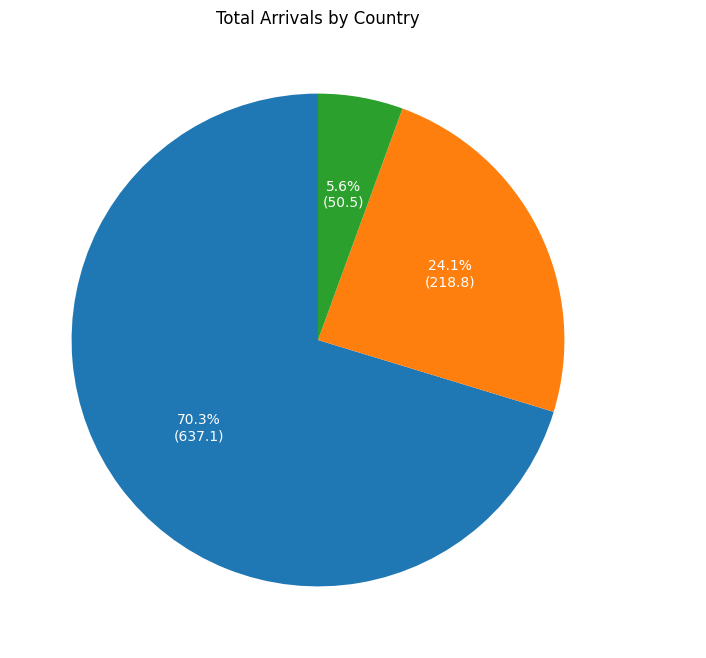

In [5]:
# 计算每个国家的外来人口总和
total_arrivals = arrivals.groupby('Country')['2022'].sum()

# 创建饼图并添加总人口数值
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(total_arrivals, labels=total_arrivals.index, autopct='%1.1f%%', startangle=90, textprops=dict(color="w"))

# 添加总人口数值
for i, text in enumerate(autotexts):
    text.set_text(f'{text.get_text()}\n({total_arrivals.iloc[i]})')

ax.set_title('Total Arrivals by Country')

plt.savefig('arrivals_pie.png', bbox_inches='tight', dpi=300)
# 显示图表
plt.show()

In [51]:
import plotly.express as px

df = px.data.gapminder()

px.scatter(df, x="gdpPercap", y="lifeExp",
           animation_frame="year", # 关键函数， 指定按照年份来更新画面
           animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100, 100000], range_y=[25, 90])


In [10]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [11]:
import plotly.express as px

df = px.data.gapminder()

fig = px.scatter(df, x="gdpPercap", y="lifeExp",
           animation_frame="year", # 关键函数， 指定按照年份来更新画面
           animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100, 100000], range_y=[25, 90])

fig.update_layout(height=800, width=600)
fig.show()
fig.write_html("animated bubble")

In [3]:
df = pd.read_excel("population and connection.xlsx")

df.head()

,Location,Country,year,Population,Connection,Strength
0,Nadi,Fiji,2022,59717,12,9254
1,Sawakasa,Fiji,2022,53614,1,0
2,Vuda(Lautoka),Fiji,2022,98264,3,333
3,Malolo(Tropica/Malolo/Likuliku/Castaway),Fiji,2022,1961,3,250
4,Vuda(Bounty Island),Fiji,2022,600,4,50


In [5]:


import pandas as pd
import plotly.express as px

# Load your data
df = pd.read_excel("population and connection.xlsx")

# Filter out rows where Connection is zero or negative
df = df[df['Connection'] > 0]

# Create the animated bubble chart
fig = px.scatter(df, x="Connection", y="Strength",
           animation_frame="year",
           animation_group="Location",
           size="Population", color="Country", hover_name="Location",
           log_x=True, size_max=60, range_x=[1, 50], range_y=[1, 13000])

# Update layout
fig.update_layout(height=800, width=600)

# Display the figure
fig.show()

# Save the figure to an HTML file
fig.write_html("animated_bubble.html")

In [7]:
fig = px.scatter(df, x="Connection", y="Strength",
           animation_frame="year",
           animation_group="Location",
           size="Population", color="Country", hover_name="Location",
           log_x=True, size_max=60, range_x=[1, 50], range_y=[1, 13000])



In [24]:
import pandas as pd
import plotly.express as px

# 加载数据
df = pd.read_excel("population and connection.xlsx")

# 过滤掉 Connection 列中为零或负值的行
df = df[df['Connection'] > 0]

# 检查数据的实际范围
print(df['Connection'].min(), df['Connection'].max())
print(df['Strength'].min(), df['Strength'].max())

# 创建动画气泡图
fig = px.scatter(df, x="Connection", y="Strength",
           animation_frame="year",
           animation_group="Location",
           size="Population", color="Country", hover_name="Location",
           log_x=True, size_max=60, range_x=[1, 50], range_y=[1, 13000])

fig.add_annotation(
    text="Bubble Size = Population",  # 注释文本
    xref="paper", yref="paper",
    x=1, y=1,  # 位置在右上角
    showarrow=False
)

# 更新布局
fig.update_layout(height=600, width=1200)
fig.write_image('strength vs connection.png', height=600, width=1200, scale=3)



# 显示图形
fig.show()

# 将图形保存为 HTML 文件
fig.write_html("animated_bubble.html")

1 23
0 11680


In [13]:
import plotly.express as px

fig = px.scatter(df, x="Connection", y="Strength",
                 animation_frame="year",
                 animation_group="Location",
                 size="Population", color="Country", hover_name="Location",
                 log_x=True, size_max=60, range_x=[1, 50], range_y=[1, 13000],
                 text="Population")

# 调整文本位置为气泡中心
fig.update_traces(textposition='middle center')

# 自定义文本格式，增加单位或格式化
fig.update_traces(texttemplate='%{text:,}')

# 调整气泡透明度，便于阅读
fig.update_traces(marker=dict(opacity=0.7))

# 添加注释，用于解释气泡大小
fig.add_annotation(
    text="Bubble Size = Population",  # 注释文本
    xref="paper", yref="paper",
    x=1.05, y=1,  # 位置在右上角
    showarrow=False
)

fig.show()